In [1]:
import torch,os,csv
import sys
sys.path.append('evaluate/')
from evaluate.retrieval import main
import matplotlib.pylab as plt
sys.path.append("..")
from _code.Reader import ImageReader

data_dict = torch.load('data_dict_emb.pth')

def Acc(eps, src):
    acc = list()
    for ep in eps:
        print('epoch:'+str(ep))
        valdset = ImageReader(data_dict['val']) 
        tradset = ImageReader(data_dict['tra']) 
        query_idx = torch.load(src+'{}pred_top100.pth'.format(ep))

        test_id = [os.path.basename(valdset.imgs[i][0])[:-4] for i in range(len(valdset))]
        result_id = [[os.path.basename(tradset.imgs[query_idx[i,j].item()][0])[:-4] for j in range(100)] for i in range(len(valdset))]

        outfile = os.path.join(src,'hotel_results_ep'+str(ep)+'.csv')
        with open(outfile,'w') as csv_file:
            for idx in range(len(test_id)):
                imId = test_id[idx]
                result_im_ids = result_id[idx]
                csv_line = str(imId) + ',' + ','.join([str(r) for r in result_im_ids]) +'\n'
                csv_file.writelines(csv_line)

        acc.append(main(outfile))
        
    return acc

epoch:0
Hotel instance retrieval accuracy for _result/HOTEL_R50/sct_B512_R5_D256_lr0.1_lam1.0/0/hotel_results_ep0.csv
Top-1: 6.21
Top-10: 11.78
Top-100: 21.80
---
Hotel chain retrieval accuracy for _result/HOTEL_R50/sct_B512_R5_D256_lr0.1_lam1.0/0/hotel_results_ep0.csv
Top-1: 25.35
Top-3: 37.97
Top-5: 44.45
epoch:40
Hotel instance retrieval accuracy for _result/HOTEL_R50/sct_B512_R5_D256_lr0.1_lam1.0/0/hotel_results_ep40.csv
Top-1: 18.54
Top-10: 30.66
Top-100: 45.73
---
Hotel chain retrieval accuracy for _result/HOTEL_R50/sct_B512_R5_D256_lr0.1_lam1.0/0/hotel_results_ep40.csv
Top-1: 47.24
Top-3: 58.53
Top-5: 63.69
epoch:80
Hotel instance retrieval accuracy for _result/HOTEL_R50/sct_B512_R5_D256_lr0.1_lam1.0/0/hotel_results_ep80.csv
Top-1: 25.73
Top-10: 39.80
Top-100: 56.69
---
Hotel chain retrieval accuracy for _result/HOTEL_R50/sct_B512_R5_D256_lr0.1_lam1.0/0/hotel_results_ep80.csv
Top-1: 55.81
Top-3: 65.68
Top-5: 70.20
epoch:120
Hotel instance retrieval accuracy for _result/HOTEL_R50

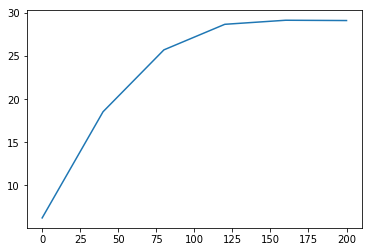

In [5]:
ep = [i for i in range(0,201,40)]
plt.plot(ep, Acc(ep, '_result/HOTEL_R50/sct_B512_R5_D256_lr0.1_lam1.0/0/'))

In [9]:
[Acc([200], '_result/HOTEL_R50/sct_B512_R5_D256_lr0.1_lam1.0/{}/'.format(i))[0] for i in range(3)]

epoch:200
Hotel instance retrieval accuracy for _result/HOTEL_R50/sct_B512_R5_D256_lr0.1_lam1.0/0/hotel_results_ep200.csv
Top-1: 29.14
Top-10: 44.45
Top-100: 61.53
---
Hotel chain retrieval accuracy for _result/HOTEL_R50/sct_B512_R5_D256_lr0.1_lam1.0/0/hotel_results_ep200.csv
Top-1: 60.90
Top-3: 69.87
Top-5: 74.10
epoch:200
Hotel instance retrieval accuracy for _result/HOTEL_R50/sct_B512_R5_D256_lr0.1_lam1.0/1/hotel_results_ep200.csv
Top-1: 29.38
Top-10: 44.43
Top-100: 61.45
---
Hotel chain retrieval accuracy for _result/HOTEL_R50/sct_B512_R5_D256_lr0.1_lam1.0/1/hotel_results_ep200.csv
Top-1: 60.65
Top-3: 70.67
Top-5: 74.45
epoch:200
Hotel instance retrieval accuracy for _result/HOTEL_R50/sct_B512_R5_D256_lr0.1_lam1.0/2/hotel_results_ep200.csv
Top-1: 29.20
Top-10: 44.25
Top-100: 61.62
---
Hotel chain retrieval accuracy for _result/HOTEL_R50/sct_B512_R5_D256_lr0.1_lam1.0/2/hotel_results_ep200.csv
Top-1: 60.79
Top-3: 70.62
Top-5: 74.50


[29.137026239067055, 29.38192419825073, 29.201166180758015]

In [10]:
print(torch.Tensor([29.14, 29.38, 29.20]).mean().item(),torch.Tensor([29.14, 29.38, 29.20]).std().item())
print(torch.Tensor([44.45, 44.43, 44.25]).mean().item(),torch.Tensor([44.45, 44.43, 44.25]).std().item())
print(torch.Tensor([61.53, 61.45, 61.62]).mean().item(),torch.Tensor([61.53, 61.45, 61.62]).std().item())
print(torch.Tensor([60.90, 60.65, 60.79]).mean().item(),torch.Tensor([60.90, 60.65, 60.79]).std().item())
print(torch.Tensor([69.87, 70.67, 70.62]).mean().item(),torch.Tensor([69.87, 70.67, 70.62]).std().item())
print(torch.Tensor([74.10, 74.45, 74.50]).mean().item(),torch.Tensor([74.10, 74.45, 74.50]).std().item())

29.239999771118164 0.12489961087703705
44.37666702270508 0.1101517379283905
61.533329010009766 0.08504810929298401
60.779998779296875 0.1252996176481247
70.38666534423828 0.4481428861618042
74.3499984741211 0.2179451286792755
